## Optional HW6: Scatterplot Matrix

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(197)
numvars, numdata = 4, 10
data = pd.DataFrame(10 * np.random.random((numvars, numdata)), index=['mpg', 'disp', 'drat', 'wt']).T
data

### Prob 1
#### Create a function `scatterplot_matrix` that generates a scatter plot matrix from the above data set as below

```python
%matplotlib inline
fig = scatterplot_matrix(data,
            linestyle='none', marker='o', color='black', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.show()```

<div>
<img src="https://i.stack.imgur.com/Sz6SK.jpg" width="700"/>
</div>

In [6]:
def scatterplot_matrix(data, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numdata, numvars = data.shape
    names = data.columns
    data = data.T.to_numpy()
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

Text(0.5,0.98,'Simple Scatterplot Matrix')

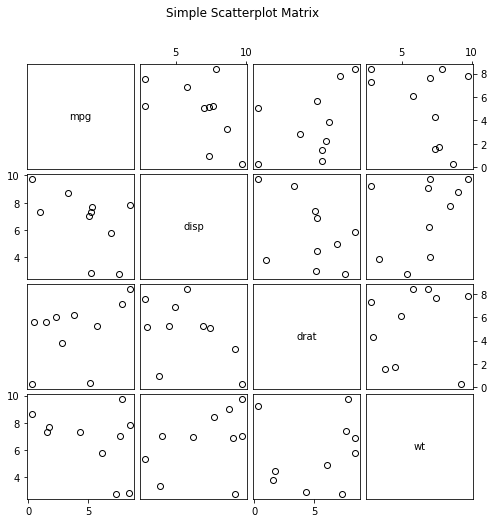

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(197)
numvars, numdata = 4, 10
data = pd.DataFrame(10 * np.random.random((numvars, numdata)), index=['mpg', 'disp', 'drat', 'wt']).T

%matplotlib inline
fig = scatterplot_matrix(data,
            linestyle='none', marker='o', color='black', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.show()


### Prob 2
#### Do the above in `seaborn` (don't worry about the diagonal subplots) . Example:

```python
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
```

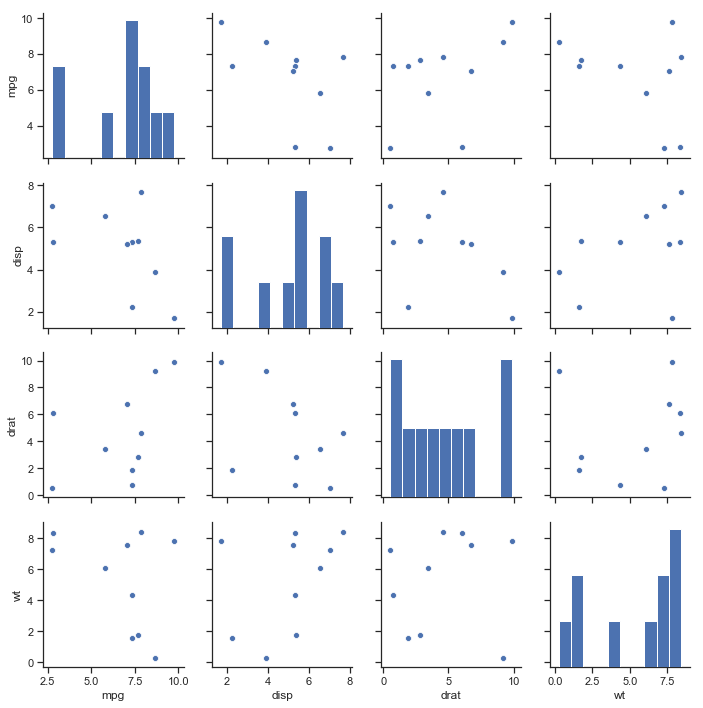

In [9]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data)